# Generate all connected graphs (doesn't work)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [165]:
def plot_graphs(graphs, figsize=14, dotsize=20):
    """Utility to plot a lot of graphs from an array of graphs. 
    Each graphs is a list of edges; each edge is a tuple."""
    n = len(graphs)
    fig = plt.figure(figsize=(figsize,figsize))
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        g = nx.Graph()
        for e in graphs[i]:            
            g.add_edge(e[0],e[1])
        nx.draw_kamada_kawai(g, node_size=dotsize)
        print('.', end='')

#plot_graphs([[(0,1),(1,2),(1,3)]])

Drawing...
....

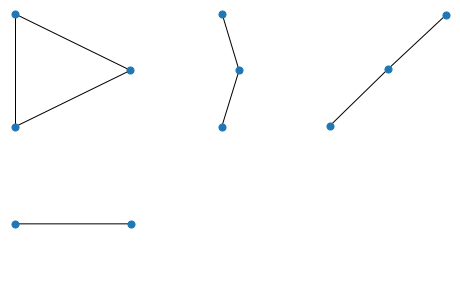

In [108]:
def make_graphs(n=2, i=None, j=None, js=None):
    """Make a graph, recursively, by either including, or skipping an edge.
    Edges are given in lexicographical order, by construction."""
    out = []
    if i is None: # First call
        out  = [[(0,1)]+r for r in make_graphs(n=n, i=0, j=1, js=set([1]))]
    elif j<n-1:
        out += [[(i,j+1)]+r for r in make_graphs(n=n, i=i, j=j+1, js=js | set([j+1]))]
        out += [          r for r in make_graphs(n=n, i=i, j=j+1, js=js)]
    elif i<n-1:
        out = make_graphs(n=n, i=i+1, j=i+1, js=js)
    else:
        out = [[]]
    return out
                                                  
gs = make_graphs(3)
print('Drawing...')
plot_graphs(gs)

In [62]:
def perm(n, s=None):
    """All permutations of n elements."""
    if s is None: return perm(n, tuple(range(n)))
    if not s: return [[]]
    return [[i]+p for i in s for p in perm(n, tuple([k for k in s if k!=i]))]

perm(3)

[[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]

In [115]:
def permute(g, n):
    """Create a set of all possible isomorphic codes for a graph, 
    as nice hashable tuples. All edges are i<j, and sorted lexicographically."""
    ps = perm(n)
    out = []
    for p in ps:
        out.append(tuple(sorted([(p[i],p[j]) if p[i]<p[j] else (p[j],p[i])for i,j in g])))
    return out

permute([(0, 1), (0, 2)], 3)

[((0, 1), (0, 2)),
 ((0, 1), (0, 2)),
 ((0, 1), (1, 2)),
 ((0, 1), (1, 2)),
 ((0, 2), (1, 2)),
 ((0, 2), (1, 2))]

In [150]:
def connected(g):
    """Check if the graph is full connected, with Union-Find."""
    nodes = set([i for e in g for i in e])
    roots = {node: node for node in nodes}
    
    def _root(node, depth=0):
        if node==roots[node]: return (node, depth)
        else: return _root(roots[node], depth+1)
    
    for i,j in g:
        ri,di = _root(i)
        rj,dj = _root(j)
        if ri==rj: continue
        if di<=dj: roots[ri] = rj
        else:      roots[rj] = ri
    return len(set([_root(node)[0] for node in nodes]))==1

assert connected([(0, 1), (0, 2), (1, 3)])
assert not connected([(0, 1), (2, 3)])           

In [151]:
def filter(gs, target_nv):
    """Filter all improper graphs: those with not enough nodes, 
    those not fully connected, and those isomorphic to previously considered."""
    mem = set({})
    gs2 = []
    for g in gs:
        nv = len(set([i for e in g for i in e]))
        if nv != target_nv:
            continue
        if not connected(g):
            continue
        if tuple(sorted(g)) not in mem:
            gs2.append(g)
            mem |= set(permute(g, target_nv))
        #print('\n'.join([str(a) for a in mem]))
    return gs2
        
filter(gs, 3)

[]

Building...
Filtering...
Drawing...
.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

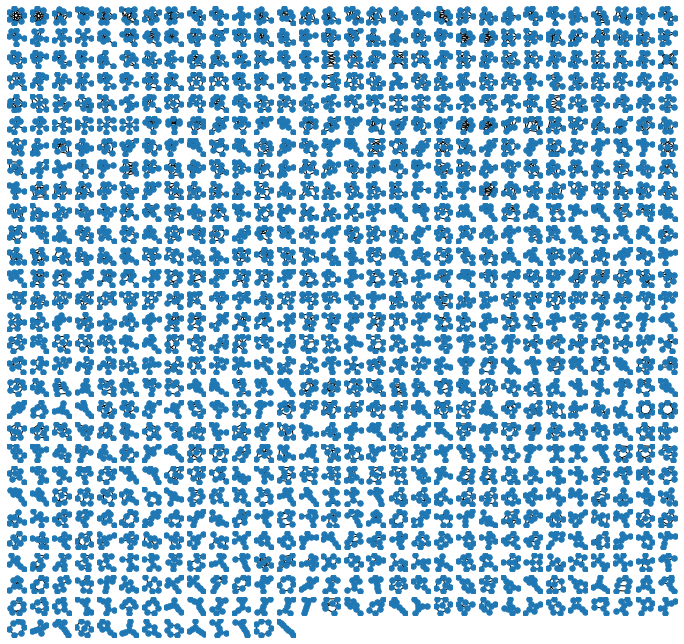

In [157]:
# Finally, we can do the calculation and make the plot!

NV = 7
print('Building...')
gs = make_graphs(NV)
print('Filtering...')
gs = filter(gs, NV)
print('Drawing...')
plot_graphs(gs, figsize=14, dotsize=20)

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

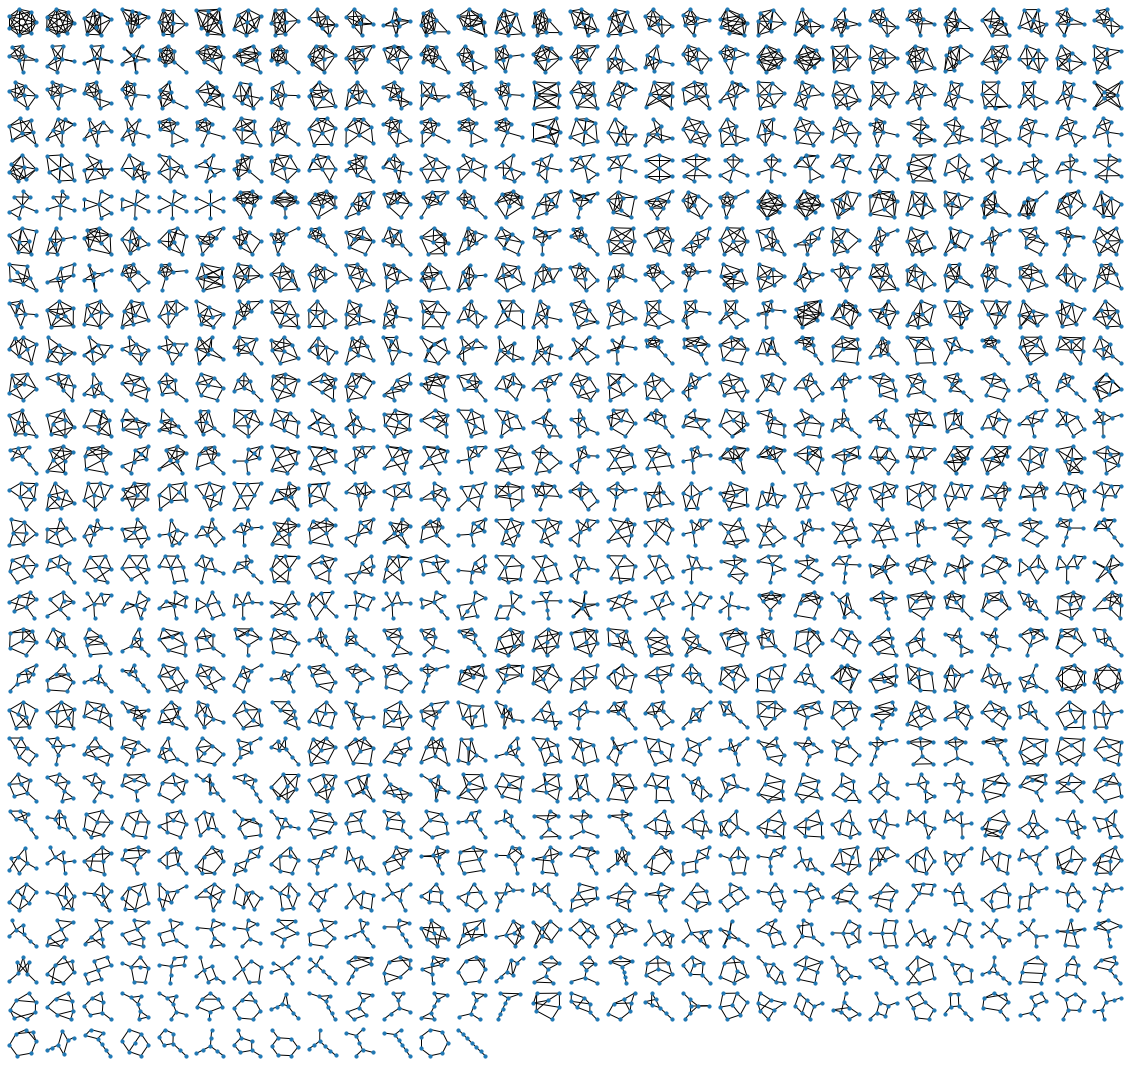

In [166]:
# Plot again, with better layout
plot_graphs(gs, figsize=20, dotsize=10)